In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Задание 1 
### Проверка гипотезы независимости двух признаков

In [2]:
df = pd.read_csv('r4z1.csv')
sample = list(df.to_records(index=False))
print(sample)

[(117.3, 87.), (114.2, 81.2), (114., 78.7), (119.1, 86.1), (122.9, 83.1), (118.1, 89.8), (118.6, 82.3), (113.7, 82.3), (116.7, 84.2), (114.4, 80.8), (118.8, 85.4), (122.5, 83.3), (122.3, 83.7), (117., 85.2), (117.8, 88.4), (125.5, 91.5), (117.1, 84.3), (119., 83.7), (111.7, 79.3), (114.4, 85.4), (120.5, 88.8), (118.1, 82.7), (123.6, 86.2), (121., 82.8), (119.2, 85.), (114.9, 82.1), (119.9, 82.8), (114.8, 83.8), (115., 83.2), (115.1, 82.2), (121.4, 83.5), (120., 88.3), (116.4, 79.4), (113.5, 83.6), (117.5, 82.7), (116.9, 83.2), (117.3, 83.4), (124.7, 86.9), (118.6, 80.), (114.3, 81.2), (117., 86.5), (120.4, 85.2), (117.2, 84.1), (120.4, 82.1), (116.5, 81.4), (107.3, 85.4), (120.8, 84.7), (122.4, 79.9), (116.2, 84.6), (118.9, 82.7), (114.4, 80.9), (119.1, 88.8), (112., 90.7), (119.8, 87.9), (127.4, 84.3), (117.1, 84.4), (118.1, 87.9), (119.4, 84.3), (117.4, 86.6), (119.3, 85.4), (120.4, 83.8), (113.5, 87.5), (115.9, 87.5), (119.9, 85.7), (124.8, 86.), (122.5, 83.9), (124.7, 88.1), (113.4

In [3]:
r = 5
s = 5

x1 = 114.05
xr = 122.05
x_dif = (xr - x1) / r

y1 = 81.05
ys = 87.05
y_dif = (ys - y1) / s

bot_inf = -(10 ** 9)
up_inf = 10 ** 9

In [4]:
def create_intervals(borders):
    intervals = []
    
    intervals.append((bot_inf, borders[0]))
    for i in range(1, len(borders)):
        intervals.append((borders[i - 1], borders[i]))
    intervals.append((borders[-1], up_inf))
    
    return intervals

In [5]:
x_intervals = list(np.linspace(x1, xr, r))
x_intervals = create_intervals(x_intervals)
x_intervals

[(-1000000000, 114.05),
 (114.05, 116.05),
 (116.05, 118.05),
 (118.05, 120.05),
 (120.05, 122.05),
 (122.05, 1000000000)]

In [6]:
y_intervals = list(np.linspace(y1, ys, s))
y_intervals = create_intervals(y_intervals)
y_intervals

[(-1000000000, 81.05),
 (81.05, 82.55),
 (82.55, 84.05),
 (84.05, 85.55),
 (85.55, 87.05),
 (87.05, 1000000000)]

In [7]:
n = r + 2
m = s + 2
matrix = [[0 for _ in range(n)] for _ in range(m)]
matrix

[[0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0]]

In [8]:
for pair in sample:
    for i in range(len(x_intervals)):
        for j in range(len(y_intervals)):
            if x_intervals[i][0] < pair[0] <= x_intervals[i][1] and y_intervals[j][0] < pair[1] <= y_intervals[j][1]:
                matrix[i][j] += 1

In [9]:
matrix

[[6, 2, 1, 3, 1, 2, 0],
 [3, 5, 5, 1, 1, 4, 0],
 [1, 2, 3, 8, 3, 1, 0],
 [2, 1, 7, 5, 2, 5, 0],
 [0, 1, 3, 4, 1, 1, 0],
 [1, 0, 6, 2, 3, 3, 0],
 [0, 0, 0, 0, 0, 0, 0]]

In [10]:
for i in range(n - 1):
    row_sum = 0
    for j in range(m - 1):
        row_sum += matrix[i][j]
    matrix[i][-1] = row_sum
    
for j in range(m - 1):
    column_sum = 0
    for i in range(n - 1):
        column_sum += matrix[i][j]
    matrix[-1][j] = column_sum
    
general_sum = 0
for i in range(n - 1):
    general_sum += matrix[i][-1]
matrix[-1][-1] = general_sum

In [11]:
matrix

[[6, 2, 1, 3, 1, 2, 15],
 [3, 5, 5, 1, 1, 4, 19],
 [1, 2, 3, 8, 3, 1, 18],
 [2, 1, 7, 5, 2, 5, 22],
 [0, 1, 3, 4, 1, 1, 10],
 [1, 0, 6, 2, 3, 3, 15],
 [13, 11, 25, 23, 11, 16, 99]]

In [12]:
stat = 0
for i in range(n):
    for j in range(m):
        temp = matrix[i][-1] * matrix[-1][j]
        stat += (matrix[-1][-1] * matrix[i][j] - temp) ** 2 / (matrix[-1][-1] * temp)

In [13]:
stat

35.209729893104615

In [14]:
alpha = 0.01
degrees_of_freedom = r * s

In [15]:
p = 1 - chi2(df=degrees_of_freedom).cdf(stat)
p

0.08447605728300489

In [16]:
if p > alpha:
    print('признаки независимы')
else:
    print('признаки зависимы')

признаки независимы


# Задание 2
### Построение линии регрессии

In [17]:
df = pd.read_csv('r4z2.csv')
sample = list(df.to_records(index=False))
print(sample)

[(117.3, 87.), (114.2, 81.2), (114., 78.7), (119.1, 86.1), (122.9, 83.1), (118.1, 89.8), (118.6, 82.3), (113.7, 82.3), (116.7, 84.2), (114.4, 80.8), (118.8, 85.4), (122.5, 83.3), (122.3, 83.7), (117., 85.2), (117.8, 88.4), (125.5, 91.5), (117.1, 84.3), (119., 83.7), (111.7, 79.3), (114.4, 85.4), (120.5, 88.8), (118.1, 82.7), (123.6, 86.2), (121., 82.8), (119.2, 85.), (114.9, 82.1), (119.9, 82.8), (114.8, 83.8), (115., 83.2), (115.1, 82.2), (121.4, 83.5), (120., 88.3), (116.4, 79.4), (113.5, 83.6), (117.5, 82.7), (116.9, 83.2), (117.3, 83.4), (124.7, 86.9), (118.6, 80.), (114.3, 81.2), (117., 86.5), (120.4, 85.2), (117.2, 84.1), (120.4, 82.1), (116.5, 81.4), (107.3, 85.4), (120.8, 84.7), (122.4, 79.9), (116.2, 84.6), (118.9, 82.7), (114.4, 80.9), (119.1, 88.8), (112., 90.7), (119.8, 87.9), (127.4, 84.3), (117.1, 84.4), (118.1, 87.9), (119.4, 84.3), (117.4, 86.6), (119.3, 85.4), (120.4, 83.8), (113.5, 87.5), (115.9, 87.5), (119.9, 85.7), (124.8, 86.), (122.5, 83.9), (124.7, 88.1), (113.4

In [18]:
x = [point[0] for point in sample]
mean_x = np.mean(x)
std_x = np.std(x)

In [19]:
y = [point[1] for point in sample]
mean_y = np.mean(y)
std_y = np.std(y)

In [20]:
corr_coeff = np.mean([(point[0] - mean_x) * (point[1] - mean_y) for point in sample]) / (std_x * std_y)
corr_coeff

0.3010627235288228

In [21]:
line_y = [min(y), max(y)]

equation = lambda y: mean_x + corr_coeff * (std_x / std_y) * (y - mean_y)
line_x = [equation(line_y[0]), equation(line_y[1])]

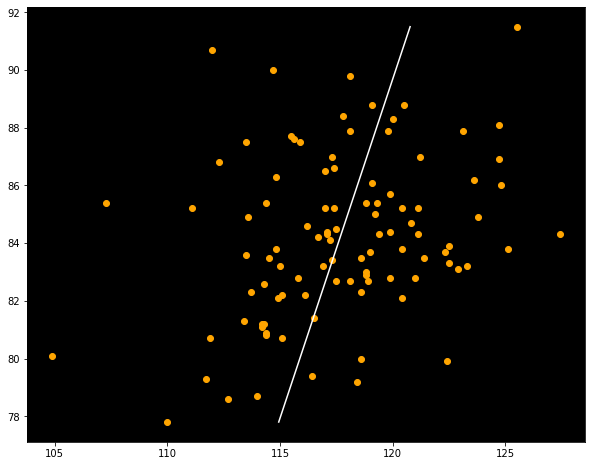

In [22]:
fig, ax = plt.subplots()

ax.scatter(x, y, c='orange')
ax.plot(line_x, line_y, c='white')

ax.set_facecolor('black')
fig.set_figwidth(10)  
fig.set_figheight(8)

plt.show()

In [23]:
Y = 82
prediction = equation(Y)
prediction

116.7289466661796